# The battle of neighborhoods - Indian Cuisine Recommender Model - For Massachusetts , USA

# Introduction:

## Massachusetts with its diverse culture comes with diverse cuisines like Indian, Chinese, Mediterranean, Mexican etc.
## We wanted to do some detailed exploratory data analysis of all the neighbourhoods in Massachusetts and find answers to below questions.  

# Problem statement :
## Find answers to following questions: 
## 1. What are best location in Massachusetts for Indian Cuisine?
## 2. Which areas have most Indian Restaurants ?
## 3. Which all areas lack Indian Restaurants but potential to improve?
## 4. Which is the biggest chain of Indian restaurants in Massachusetts?

# Target Audience :

## Anyone who wish to find an Indian Restaurant for a weekend lunch or buffet

# Why it is important :

## Massachusetts is a metropoliton city with many immigrants from various countries who have different food tastes and styles. This system can also be used to find not only Indian Restaurant but also other types of restaurants.

# Data Sourcing:
## For this project I would need list of Neighborhoods in Massachusetts along with their latitude and longitude.
## I would take above mentioned data from : https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/export/?refine.state=MA
## It would consist of Zip code, Neighborhood name, Latitude and Longitude
### Example:
Zip	City	Latitude	Longitude
1720	Acton	42.477142	-71.4422

## I would need to find the Indian restaurants in each neighbourhood of Massachusetts based on above data. For that I would be using Foursquare API. 
### By using this API I will get all the venues in each neighbourhood. I can then filter these venues to get only Indian restaurants.


## Methodology:
We begin by collecting the Massachusetts data from "https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/export/?refine.state=MA".
We will find all venues for each neighborhood using FourSquare API.
We will then filter out all Indian Restuarant venues.
Next using FourSquare API, we will find the Ratings and Like count for all the Indian Resturants.
Next we will sort the data keeping Ratings as the constraint.
We will plot bar chart, pie chart and map using python's visualization library.
Lets Start by importing the required Libraries.

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
!pip install beautifulsoup4
from bs4 import BeautifulSoup
!pip install geocoder
import geocoder
import os
!pip install folium
import folium # map rendering library
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline


print('Libraries imported.')

## Massachusetts zip code, Neighborhood and its latitude and logintude has been downloaded from the URL mentioned above and the CSV file has been downloaded manually and it has been converted to pandas data frame

In [2]:
Geospatial_Coordinates = pd.read_csv('us-zip-code-latitude-and-longitude.csv') 
Geospatial_Coordinates.columns=["Zip","City","Latitude","Longitude"]
Geospatial_Coordinates['Zip']=Geospatial_Coordinates['Zip'].apply(lambda x: '{0:0>5}'.format(x))
Geospatial_Coordinates

,Zip,City,Latitude,Longitude
0,01720,Acton,42.477142,-71.442200
1,01899,Andover,42.635443,-70.879123
2,02174,Arlington,42.417695,-71.167083
3,01721,Ashland,42.257956,-71.458860
4,01730,Bedford,42.496679,-71.275040
5,02178,Belmont,42.446396,-71.459405
6,02113,Boston,42.365028,-71.056360
7,02185,Braintree,42.180048,-71.089230
8,01803,Burlington,42.506362,-71.200080
9,02238,Cambridge,42.446396,-71.459405


### Four square API credentials

In [88]:
CLIENT_ID = 'xx' # your Foursquare ID
CLIENT_SECRET = 'xx' # your Foursquare Secret
VERSION = '20200710' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: xx
CLIENT_SECRET:xx


### Define function to get venues using Four square API

In [4]:
def get_venues(lat,lng):
    
    #set variables
    radius=10000
    LIMIT=100
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

## For each and every Neighborhood the above defined function has been called to get the venues and then only Indian Restaurants have been filtered and assigned to a data frame

In [6]:
# prepare neighborhood list that contains indian resturants
column_names=['Neighborhood', 'ID','Name']
indian_rest_bo=pd.DataFrame(columns=column_names)
count=1
for row in Geospatial_Coordinates.values.tolist():
    Zip, City, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    indian_resturants=venues[venues['Category']=='Indian Restaurant']   
    print('(',count,'/',len(Geospatial_Coordinates),')','Indian Resturants in '+City+':'+str(len(indian_resturants)))
    for resturant_detail in indian_resturants.values.tolist():
        id, name , category=resturant_detail
        indian_rest_bo = indian_rest_ny.append({'Neighborhood': City, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1
    indian_rest_bo

( 1 / 39 ) Indian Resturants in Acton:0
( 2 / 39 ) Indian Resturants in Andover:1
( 3 / 39 ) Indian Resturants in Arlington:1
( 4 / 39 ) Indian Resturants in Ashland:2
( 5 / 39 ) Indian Resturants in Bedford:1
( 6 / 39 ) Indian Resturants in Belmont:0
( 7 / 39 ) Indian Resturants in Boston:0
( 8 / 39 ) Indian Resturants in Braintree:0
( 9 / 39 ) Indian Resturants in Burlington:1
( 10 / 39 ) Indian Resturants in Cambridge:0
( 11 / 39 ) Indian Resturants in Chelmsford:2
( 12 / 39 ) Indian Resturants in Chelsea:0
( 13 / 39 ) Indian Resturants in Concord:0
( 14 / 39 ) Indian Resturants in Danvers:0
( 15 / 39 ) Indian Resturants in Dedham:0
( 16 / 39 ) Indian Resturants in Everett:0
( 17 / 39 ) Indian Resturants in Framingham:0
( 18 / 39 ) Indian Resturants in Gloucester:1
( 19 / 39 ) Indian Resturants in Lexington:0
( 20 / 39 ) Indian Resturants in Lowell:2
( 21 / 39 ) Indian Resturants in Lynn:0
( 22 / 39 ) Indian Resturants in Lynnfield:0
( 23 / 39 ) Indian Resturants in Malden:0
( 24 / 

In [7]:
indian_rest_bo

,Neighborhood,ID,Name
0,Andover,4b818b22f964a520d6ad30e3,Anmol
1,Arlington,4d274b6f55a8b60cc384c2c0,Royal India Bistro
2,Ashland,4a6b3301f964a52028ce1fe3,Dosa Temple
3,Ashland,4bba80c8b35776b0e10acb01,Welcome Fine Indian Cuisine
4,Bedford,4d274b6f55a8b60cc384c2c0,Royal India Bistro
5,Burlington,4d274b6f55a8b60cc384c2c0,Royal India Bistro
6,Chelmsford,4a82fbdef964a520bcf91fe3,Udupi Bhavan
7,Chelmsford,4eac69f4f7906795c3486034,Paradise Biryani Pointe - Lowell
8,Gloucester,4b818b22f964a520d6ad30e3,Anmol
9,Lowell,4a82fbdef964a520bcf91fe3,Udupi Bhavan


## Bar diagram to show which Neighborhood has got most number of Indian Restaurants in Massachusetts

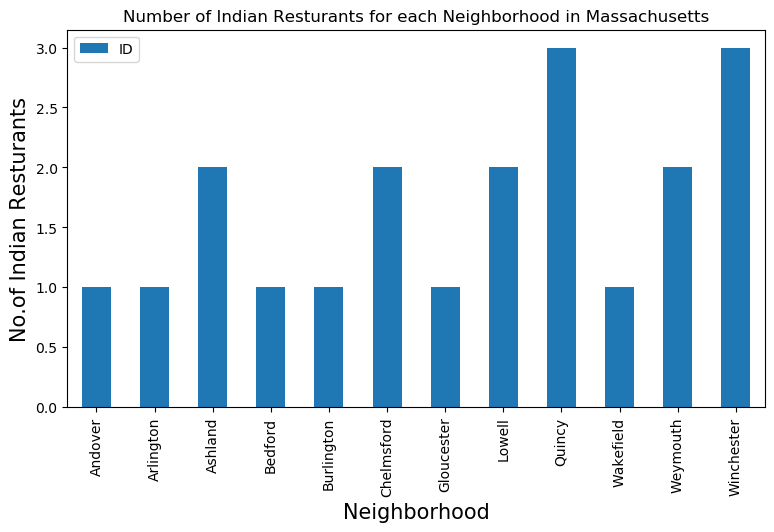

In [54]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Indian Resturants for each Neighborhood in Massachusetts')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Resturants', fontsize=15)
#giving a bar plot
indian_rest_bo.groupby('Neighborhood')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

## Pie chart to show the biggest chain of Indian Restaurants for each Neighborhood in Massachusetts

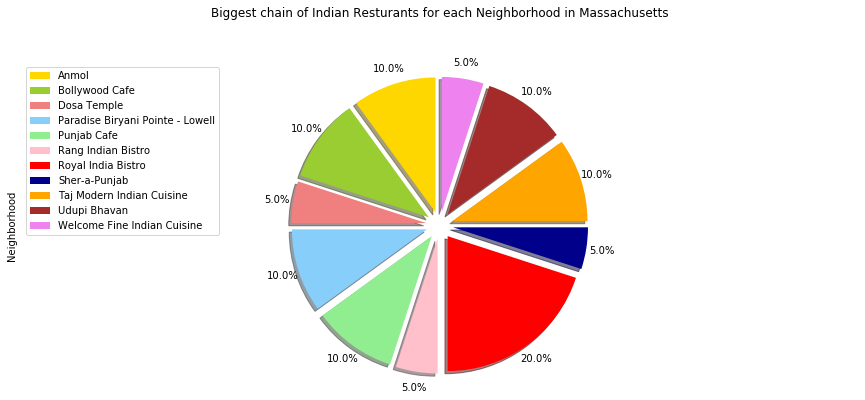

In [48]:

# group countries by continents and apply sum() function 
indian_rest_bos = indian_rest_bo.groupby('Name', axis=0).count()
indian_rest_bos

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','red','darkblue','orange','brown','violet']
explode_list = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1] # ratio for each continent with which to offset each wedge.

indian_rest_bos['Neighborhood'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

plt.axis('equal') 

plt.legend(labels=indian_rest_bos.index, loc='upper left') 

plt.title('Biggest chain of Indian Resturants for each Neighborhood in Massachusetts', y=1.12)

plt.show()

### Create function to get more details like Ratings, Likes and Tips for each and every restaurant using Foursquare API

In [ ]:
def get_venue_details(venue_id):
           
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

## Creating a pandas data frame with Likes, Ratings and Tips for each and every Indian Restaurant in Massachusetts

In [11]:
# prepare neighborhood list that contains indian resturants
column_names=['Neighborhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_stats_bo=pd.DataFrame(columns=column_names)
count=1


for row in indian_rest_bo.values.tolist():
    Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(indian_rest_bo),')','processed')
    indian_rest_stats_bo = indian_rest_stats_bo.append({
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID   Name  Likes  Rating  Tips
0  4b818b22f964a520d6ad30e3  Anmol     31     8.2    21
( 1 / 20 ) processed
                         ID                Name  Likes  Rating  Tips
0  4d274b6f55a8b60cc384c2c0  Royal India Bistro     64     8.7    22
( 2 / 20 ) processed
                         ID         Name  Likes  Rating  Tips
0  4a6b3301f964a52028ce1fe3  Dosa Temple     28     7.8    20
( 3 / 20 ) processed
                         ID                         Name  Likes  Rating  Tips
0  4bba80c8b35776b0e10acb01  Welcome Fine Indian Cuisine     11     8.0     5
( 4 / 20 ) processed
                         ID                Name  Likes  Rating  Tips
0  4d274b6f55a8b60cc384c2c0  Royal India Bistro     64     8.7    22
( 5 / 20 ) processed
                         ID                Name  Likes  Rating  Tips
0  4d274b6f55a8b60cc384c2c0  Royal India Bistro     64     8.7    22
( 6 / 20 ) processed
                         ID          Name  Likes  Rating  Tips
0  4a

In [12]:
indian_rest_stats_bo

,Neighborhood,ID,Name,Likes,Rating,Tips
0,Andover,4b818b22f964a520d6ad30e3,Anmol,31,8.2,21
1,Arlington,4d274b6f55a8b60cc384c2c0,Royal India Bistro,64,8.7,22
2,Ashland,4a6b3301f964a52028ce1fe3,Dosa Temple,28,7.8,20
3,Ashland,4bba80c8b35776b0e10acb01,Welcome Fine Indian Cuisine,11,8.0,5
4,Bedford,4d274b6f55a8b60cc384c2c0,Royal India Bistro,64,8.7,22
5,Burlington,4d274b6f55a8b60cc384c2c0,Royal India Bistro,64,8.7,22
6,Chelmsford,4a82fbdef964a520bcf91fe3,Udupi Bhavan,33,8.9,21
7,Chelmsford,4eac69f4f7906795c3486034,Paradise Biryani Pointe - Lowell,22,8.2,9
8,Gloucester,4b818b22f964a520d6ad30e3,Anmol,31,8.2,21
9,Lowell,4a82fbdef964a520bcf91fe3,Udupi Bhavan,33,8.9,21


In [13]:
indian_rest_stats_bo.shape

(20, 6)

In [14]:
indian_rest_stats_bo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Neighborhood  20 non-null     object 
 1   ID            20 non-null     object 
 2   Name          20 non-null     object 
 3   Likes         20 non-null     object 
 4   Rating        20 non-null     float64
 5   Tips          20 non-null     object 
dtypes: float64(1), object(5)
memory usage: 1.1+ KB


In [15]:
indian_rest_stats_bo['Likes']=indian_rest_stats_bo['Likes'].astype('float64')
indian_rest_stats_bo['Tips']=indian_rest_stats_bo['Tips'].astype('float64')

In [16]:
indian_rest_stats_bo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Neighborhood  20 non-null     object 
 1   ID            20 non-null     object 
 2   Name          20 non-null     object 
 3   Likes         20 non-null     float64
 4   Rating        20 non-null     float64
 5   Tips          20 non-null     float64
dtypes: float64(3), object(3)
memory usage: 1.1+ KB


## Most liked restaurant in Massachusetts

In [17]:
indian_rest_stats_bo.iloc[indian_rest_stats_bo['Likes'].idxmax()]

Neighborhood                   Arlington
ID              4d274b6f55a8b60cc384c2c0
Name                  Royal India Bistro
Likes                                 64
Rating                               8.7
Tips                                  22
Name: 1, dtype: object

## Highly rated restaurant in Massachusetts

In [19]:
indian_rest_stats_bo.iloc[indian_rest_stats_bo['Rating'].idxmax()]

Neighborhood                  Chelmsford
ID              4a82fbdef964a520bcf91fe3
Name                        Udupi Bhavan
Likes                                 33
Rating                               8.9
Tips                                  21
Name: 6, dtype: object

## Top locations in Massachusetts for Indian Restaurants

In [20]:
bos_neighborhood_stats=indian_rest_stats_bo.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
bos_neighborhood_stats.columns=['Neighborhood','Average Rating']

In [21]:
bos_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
1,Arlington,8.70
3,Bedford,8.70
4,Burlington,8.70
5,Chelmsford,8.55
7,Lowell,8.55
10,Weymouth,8.40
0,Andover,8.20
6,Gloucester,8.20
8,Quincy,8.20
9,Wakefield,8.20


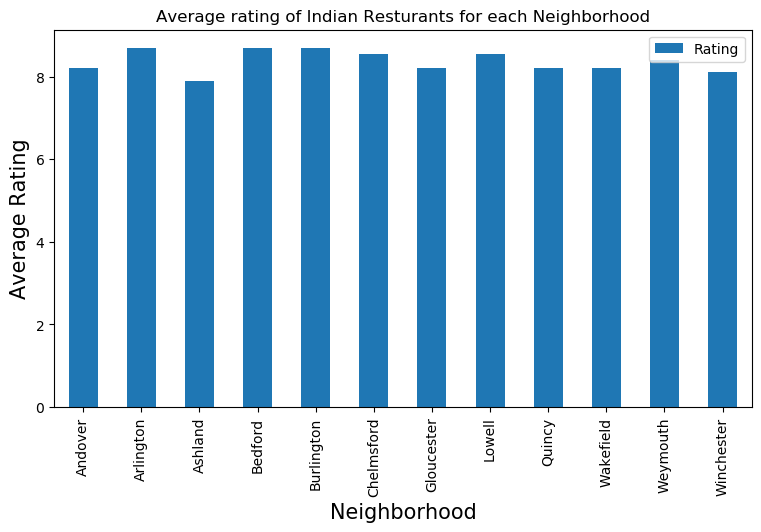

In [22]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Average rating of Indian Resturants for each Neighborhood')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
#giving a bar plot
indian_rest_stats_bo.groupby('Neighborhood').mean()['Rating'].plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [23]:
bos_neighborhood_stats=bos_neighborhood_stats[bos_neighborhood_stats['Average Rating']>=8.5]

In [24]:
bos_neighborhood_stats

,Neighborhood,Average Rating
1,Arlington,8.70
3,Bedford,8.70
4,Burlington,8.70
5,Chelmsford,8.55
7,Lowell,8.55


In [25]:
bos_neighborhood_stats = pd.merge(left=bos_neighborhood_stats, right=Geospatial_Coordinates, left_on='Neighborhood', right_on='City')

In [26]:
bos_neighborhood_stats=bos_neighborhood_stats[['Neighborhood','Latitude','Longitude','Average Rating']]

In [27]:
bos_neighborhood_stats

,Neighborhood,Latitude,Longitude,Average Rating
0,Arlington,42.417695,-71.167083,8.70
1,Bedford,42.496679,-71.275040,8.70
2,Burlington,42.506362,-71.200080,8.70
3,Chelmsford,42.595491,-71.354400,8.55
4,Lowell,42.655791,-71.305040,8.55


In [67]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="bo_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


In [68]:
bos_map = folium.Map(location=geo_location('Massachusetts'), zoom_start=12)

In [69]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the neighborhood and add each to the feature group
for lat, lng, in bos_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [70]:
bos_neighborhood_stats['Label']=bos_neighborhood_stats['Neighborhood']+', '+'('+bos_neighborhood_stats['Average Rating'].map(str)+')'


In [74]:
bos_neighborhood_stats

,Neighborhood,Latitude,Longitude,Average Rating,Label
0,Arlington,42.417695,-71.167083,8.70,"Arlington, (8.7)"
1,Bedford,42.496679,-71.275040,8.70,"Bedford, (8.7)"
2,Burlington,42.506362,-71.200080,8.70,"Burlington, (8.7)"
3,Chelmsford,42.595491,-71.354400,8.55,"Chelmsford, (8.55)"
4,Lowell,42.655791,-71.305040,8.55,"Lowell, (8.55)"


## Maps showing top 5 areas in Massachusetts for good Indian Restaurants

In [71]:
# add pop-up text to each marker on the map
for lat, lng, label in bos_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(bos_map)        
# add incidents to map
bos_map.add_child(incidents)

# Conclusion:
## Now we can answer the questions asked above in the Questions section of the notebook.

## From our analysis the answers to the above questions are:

## 1) What are best location in Massachusetts for Indian Cuisine?

### *Arlington, Bedford, Burlington, Chelmsford, Lowell. Refer above map as well as the bar diagram.*

## 2) Which areas have most Indian Restaurants ?

### *Quincy and Winchester has most Indian Restaurants. Refer the bar diagram.*

## 3) Which all areas lack Indian Restaurants but potential to improve?

### *Andover, Arlington, Bedford, Burlington, Gloucestar, Wakefield are the places which lack Indian restaurants.*
### *However, Arlington, Bedford, Burlington already has some best Indian Restaurants.*
### *So, Andover, Gloucestar and Wakefield has got the potential to improve. If one want to start an Indian Restaurant, then it would be the best place.*

## 4) Which is the biggest chain of Indian restaurants in Massachusetts?

### *Royal Indian Bistro is the biggest chain of Indian restaurants in Massachusetts. Refer the pie chart as well.*


Note:
There is always room for improvement and hence the above solution provided can also be improved for best results depending upon the data we have.
We can also develop prediction model which can accept a town as input parameter and it can recommend best Indian Restaurant in that town.